In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.regularizers import l2



In [3]:
# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# Convert target to one-hot encoded vectors
y_one_hot = tf.keras.utils.to_categorical(y, num_classes=3)

In [5]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create distribution plots for each feature
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [14]:
# Convert the data to a pandas DataFrame for better visualization
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = y

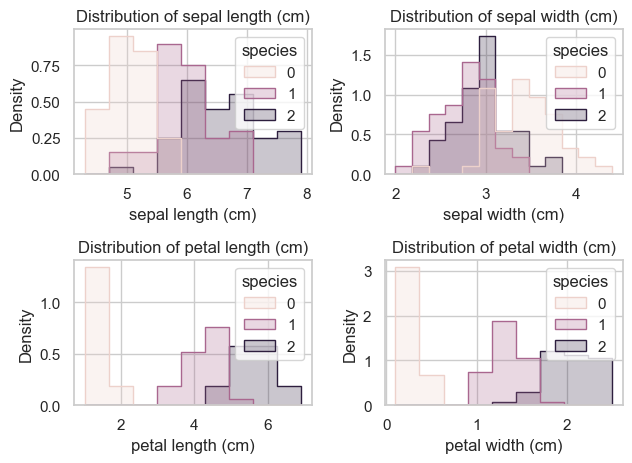

In [15]:
for idx, feature in enumerate(iris_df.columns[:-1]):
    plt.subplot(2, 2, idx+1)
    sns.histplot(data=iris_df, x=feature, hue='species', element="step", stat="density", common_norm=False)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

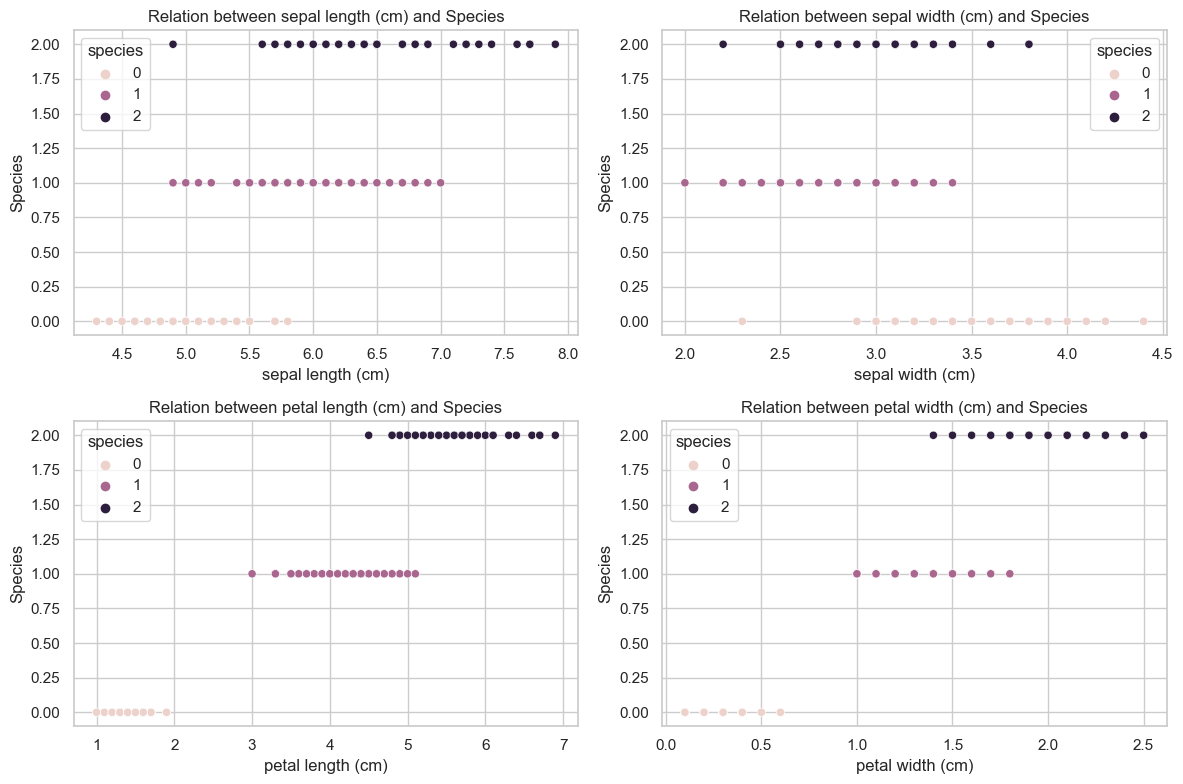

In [16]:
# Create scatter plots showing relation between features and outcome variable
plt.figure(figsize=(12, 8))

for idx, feature in enumerate(iris_df.columns[:-1]):
    plt.subplot(2, 2, idx+1)
    sns.scatterplot(data=iris_df, x=feature, y='species', hue='species', marker='o')
    plt.title(f"Relation between {feature} and Species")
    plt.xlabel(feature)
    plt.ylabel("Species")

plt.tight_layout()
plt.show()

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)


In [7]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Build a simple Sequential neural network model
model = Sequential([
    Dense(8, activation='relu', input_shape=(4,)),
    Dense(3, activation='softmax')
])

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=50, verbose=1)

Epoch 1/50
4/4 [==============================] - 1s 103ms/step - loss: 1.2302 - accuracy: 0.3519 - val_loss: 1.2400 - val_accuracy: 0.2500
Epoch 2/50
4/4 [==============================] - 0s 21ms/step - loss: 1.2094 - accuracy: 0.4630 - val_loss: 1.2240 - val_accuracy: 0.2500
Epoch 3/50
4/4 [==============================] - 0s 22ms/step - loss: 1.1885 - accuracy: 0.5093 - val_loss: 1.2086 - val_accuracy: 0.2500
Epoch 4/50
4/4 [==============================] - 0s 24ms/step - loss: 1.1697 - accuracy: 0.5093 - val_loss: 1.1936 - val_accuracy: 0.2500
Epoch 5/50
4/4 [==============================] - 0s 20ms/step - loss: 1.1486 - accuracy: 0.5185 - val_loss: 1.1791 - val_accuracy: 0.2500
Epoch 6/50
4/4 [==============================] - 0s 18ms/step - loss: 1.1313 - accuracy: 0.5185 - val_loss: 1.1647 - val_accuracy: 0.2500
Epoch 7/50
4/4 [==============================] - 0s 17ms/step - loss: 1.1135 - accuracy: 0.5370 - val_loss: 1.1506 - val_accuracy: 0.2500
Epoch 8/50
4/4 [==========

In [11]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Test Loss: 0.6003, Test Accuracy: 0.7667


In [12]:
# Generate predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

1/1 [==============================] - 0s 128ms/step


In [13]:
# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.22      0.36         9
   virginica       0.61      1.00      0.76        11

    accuracy                           0.77        30
   macro avg       0.87      0.74      0.71        30
weighted avg       0.86      0.77      0.72        30



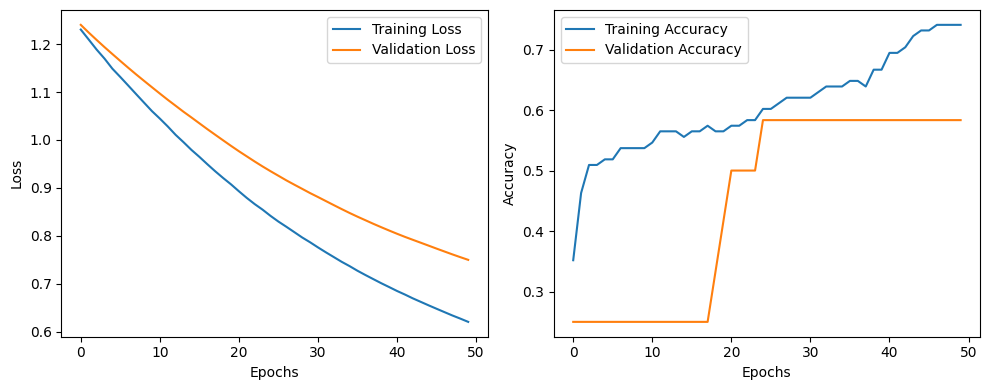

In [14]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

**1. Different Architectures:**
    Let's modify the architecture of the neural network by adding more hidden layers and using different activation functions.

In [16]:
# Build a more complex neural network model
model_complex = Sequential([
    Dense(16, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

In [17]:
# Compile the model_complex
model_complex.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model_complex
history = model_complex.fit(X_train_scaled, y_train, validation_split=0.1, epochs=50, verbose=1)

Epoch 1/50
4/4 [==============================] - 1s 49ms/step - loss: 1.0682 - accuracy: 0.3241 - val_loss: 1.0859 - val_accuracy: 0.1667
Epoch 2/50
4/4 [==============================] - 0s 10ms/step - loss: 1.0320 - accuracy: 0.4444 - val_loss: 1.0633 - val_accuracy: 0.5000
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 0.9995 - accuracy: 0.5463 - val_loss: 1.0422 - val_accuracy: 0.5833
Epoch 4/50
4/4 [==============================] - 0s 13ms/step - loss: 0.9693 - accuracy: 0.6204 - val_loss: 1.0222 - val_accuracy: 0.5833
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 0.9414 - accuracy: 0.6574 - val_loss: 1.0015 - val_accuracy: 0.5833
Epoch 6/50
4/4 [==============================] - 0s 17ms/step - loss: 0.9135 - accuracy: 0.6667 - val_loss: 0.9811 - val_accuracy: 0.5833
Epoch 7/50
4/4 [==============================] - 0s 10ms/step - loss: 0.8867 - accuracy: 0.6759 - val_loss: 0.9610 - val_accuracy: 0.5833
Epoch 8/50
4/4 [===========

In [18]:
# Evaluate the model_complex on the test set
loss, accuracy = model_complex.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Test Loss: 0.1630, Test Accuracy: 0.9667


In [19]:
# Generate predictions
y_pred = model_complex.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

1/1 [==============================] - 0s 48ms/step


In [20]:
# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



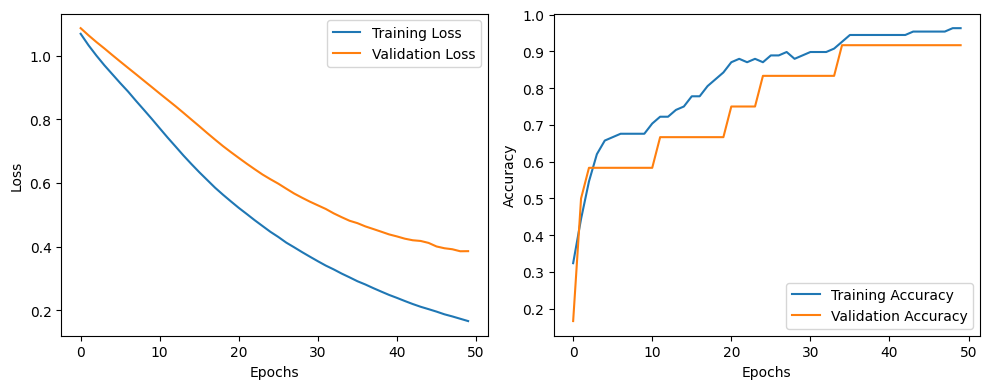

In [21]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

**2. Hyperparameter Tuning:**
We can use GridSearchCV to optimize the used hyperparameters.

In [37]:
# Define the list of hyperparameters to try
batch_sizes = [16, 32]
num_epochs = [50, 100]
optimizers = ['adam', 'rmsprop']

best_accuracy = 0.0
best_params = {}

# Loop through different hyperparameters
for batch_size in batch_sizes:
    for epochs in num_epochs:
        for optimizer in optimizers:
            # Build the model
            model = create_model(optimizer)
            
            # Train the model
            history = model.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs, verbose=0)
            
            # Evaluate the model on the validation set
            loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
            
            # Update the best parameters if accuracy improves
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                loss, best_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
                print(f"Best Test Loss: {loss:.4f}, Best Test Accuracy: {best_accuracy:.4f}, Optimizer: {optimizer}")
                best_params = {'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer}

print("Best Parameters: ", best_params)

Best Test Loss: 0.3824, Best Test Accuracy: 0.9333, Optimizer: adam
Best Test Loss: 0.1323, Best Test Accuracy: 0.9667, Optimizer: rmsprop
Best Parameters:  {'batch_size': 16, 'epochs': 100, 'optimizer': 'rmsprop'}


****3. Regularization Techniques:**
We can add L2 regularization (weight decay) to the hidden layers of the neural network.

In [38]:
# Build a neural network model with L2 regularization
model_regularized = Sequential([
    Dense(8, activation='relu', input_shape=(4,), kernel_regularizer=l2(0.01)),
    Dense(3, activation='softmax')
])

In [40]:
model_regularized.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model_complex
history = model_regularized.fit(X_train_scaled, y_train, validation_split=0.1, epochs=50, verbose=1)

Epoch 1/50
4/4 [==============================] - 0s 43ms/step - loss: 1.1693 - accuracy: 0.4259 - val_loss: 1.2875 - val_accuracy: 0.2500
Epoch 2/50
4/4 [==============================] - 0s 10ms/step - loss: 1.1512 - accuracy: 0.4444 - val_loss: 1.2705 - val_accuracy: 0.3333
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 1.1333 - accuracy: 0.4630 - val_loss: 1.2540 - val_accuracy: 0.3333
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 1.1162 - accuracy: 0.4907 - val_loss: 1.2385 - val_accuracy: 0.3333
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 1.1001 - accuracy: 0.4907 - val_loss: 1.2241 - val_accuracy: 0.3333
Epoch 6/50
4/4 [==============================] - 0s 10ms/step - loss: 1.0843 - accuracy: 0.5278 - val_loss: 1.2095 - val_accuracy: 0.3333
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 1.0686 - accuracy: 0.5556 - val_loss: 1.1954 - val_accuracy: 0.3333
Epoch 8/50
4/4 [===========

In [41]:
# Evaluate the model_complex on the test set
loss, accuracy = model_regularized.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Test Loss: 0.5900, Test Accuracy: 0.8000


In [42]:
# Generate predictions
y_pred = model_regularized.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

1/1 [==============================] - 0s 42ms/step


In [43]:
#Print classification report
print(classification_report(y_true, y_pred_classes, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       0.83      1.00      0.91        10
  versicolor       1.00      0.33      0.50         9
   virginica       0.73      1.00      0.85        11

    accuracy                           0.80        30
   macro avg       0.86      0.78      0.75        30
weighted avg       0.85      0.80      0.76        30

